In [1]:
# %load_ext autoreload
# %autoreload 2

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import skimage, glob 
import skimage.exposure
import mosaic as MOSAIC
import utility as UTILITY
import importlib 

# importlib.reload(UTILITY_7)
importlib.reload(MOSAIC)

# Load demo data of 2 channel 
f = r"./data/CD8_CD3e_CD4_.tiff"
im = skimage.io.imread(f).astype(np.single)
print(f'im: {im.shape}')

# # pre processing
im_drift_corrected = UTILITY.drift_corr(im)
im_drift_corrected_bg_removed = UTILITY.bg_remove(im_drift_corrected)


# call PICASSO
mosaic = MOSAIC.MOSAIC()
mosaic.set_parameters(bins=256, beta=0, gamma=0.1, cycles=20)

# test img 
im_mosaic, P = mosaic.mosaic(im_drift_corrected_bg_removed)
P

im: (1024, 1024, 3)
shift: [-0.09 -0.31], img: (1024, 1024, 3)


c:\Users\dummy\anaconda3\envs\mosaic\lib\site-packages\skimage\registration\_phase_cross_correlation.py:112: RuntimeWarning: overflow encountered in scalar multiply
  (src_amp * target_amp)


shift: [-0.06  0.19], img: (1024, 1024, 3)
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

array([[ 1.00038016, -0.09347812, -0.00294069],
       [-0.00801538,  1.00030143,  0.00238934],
       [ 0.00583945, -0.02098842,  0.99996214]])

im: (1024, 1024, 3), im_mosaic: (1024, 1024, 3)


c:\Users\dummy\anaconda3\envs\mosaic\lib\site-packages\skimage\color\colorconv.py:290: RuntimeWarning: divide by zero encountered in divide
  out_s = delta / out_v
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


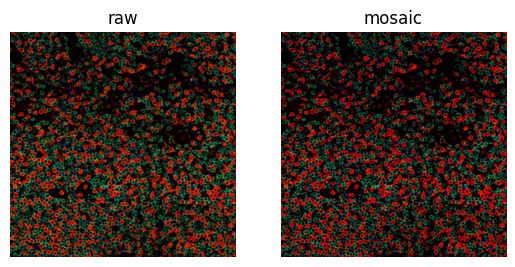

In [2]:
# this is for 3-colors
# show results
print(f'im: {im_drift_corrected.shape}, im_mosaic: {im_mosaic.shape}')

# show rgb
ims = [im/im.max(), im_mosaic/im_mosaic.max()]
ims_rgb = [skimage.exposure.equalize_adapthist(im_a) for im_a in ims]

titles = ['raw', 'mosaic']
fig, axs = plt.subplots(1,2, dpi=100)
for i, im_a in enumerate(ims_rgb):
    axs[i].imshow(im_a)
    axs[i].axis('off')
    axs[i].set_title(titles[i])
plt.show()


In [3]:
# using mapari
import napari 
viewer = napari.Viewer()
viewer.add_image(im_drift_corrected, channel_axis=2, gamma=0.5)

labels = ['CD8', 'CD3e', 'CD4']
cmap   = ['red', 'green', 'blue']

for i,l in enumerate(cmap):
    viewer.layers[i].colormap = l
    viewer.layers[i].name = labels[i]
